<a href="https://colab.research.google.com/github/ntlt/Nguyen-Thi-Linh-Trang-191446079/blob/main/CNN_10food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [89]:
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

In [90]:
x_train = train_path = '/content/drive/MyDrive/Colab Notebooks/Mon an'
x_test = test_path = '/content/drive/MyDrive/Colab Notebooks/Mon an'

In [91]:
x_train = x_test = ImageDataGenerator(rescale=1/255)

train_dataset = x_train.flow_from_directory( train_path, target_size=(224, 224),
                                               batch_size=10, class_mode='categorical')

validation_dataset = x_test.flow_from_directory(test_path, target_size=(224, 224),
                                                batch_size=10, class_mode='categorical')

Found 109 images belonging to 10 classes.
Found 109 images belonging to 10 classes.


In [92]:
model=Sequential([                  
                  Conv2D(32, (3,3), activation='relu', padding = 'same', input_shape=(224,224,3)),
                  MaxPool2D(pool_size=(2,2)),

                  Conv2D(64, (3,3), activation='relu', padding = 'same'),
                  MaxPool2D(pool_size=(2, 2)),


                  Conv2D(128, (3,3), activation='relu', padding = 'same'),
                  MaxPool2D(pool_size=(2, 2)),
                  Dropout(0.2),

                  Conv2D(128, (3,3), activation='relu', padding = 'same'),
                  Flatten(), Dropout(0.5),
                  Dense(units=10, activation='softmax') ])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 28, 28, 128)     

In [93]:
model.compile(optimizer = Adam(learning_rate=0.0005),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=train_dataset, steps_per_epoch=len(train_dataset), 
                    validation_data=validation_dataset, epochs=10, verbose=1)

Epoch 1/10
11/11 [==============================] - 2s 133ms/step - loss: 2.4336 - accuracy: 0.1101 - val_loss: 2.2869 - val_accuracy: 0.3303
Epoch 2/10
11/11 [==============================] - 1s 116ms/step - loss: 2.2798 - accuracy: 0.1284 - val_loss: 2.2255 - val_accuracy: 0.1927
Epoch 3/10
11/11 [==============================] - 1s 110ms/step - loss: 2.2070 - accuracy: 0.1835 - val_loss: 2.0291 - val_accuracy: 0.3028
Epoch 4/10
11/11 [==============================] - 1s 108ms/step - loss: 1.9238 - accuracy: 0.3211 - val_loss: 1.5803 - val_accuracy: 0.4679
Epoch 5/10
11/11 [==============================] - 1s 113ms/step - loss: 1.5034 - accuracy: 0.5596 - val_loss: 0.8688 - val_accuracy: 0.7890
Epoch 6/10
11/11 [==============================] - 1s 111ms/step - loss: 0.9226 - accuracy: 0.7064 - val_loss: 0.4181 - val_accuracy: 0.9174
Epoch 7/10
11/11 [==============================] - 1s 115ms/step - loss: 0.4091 - accuracy: 0.8991 - val_loss: 0.1589 - val_accuracy: 0.9541
Epoch 

In [94]:
from tensorflow.keras.models import load_model
model.save('CNN-FOOD.h5')
model_CNN = load_model('CNN-FOOD.h5')

['banh mi']


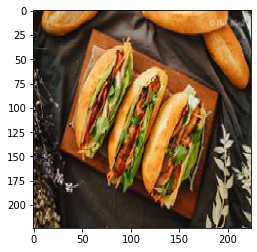

In [95]:
sample = load_img('/content/drive/MyDrive/Colab Notebooks/Mon an/banh mi/1dcae24d4745985753e71e2595f1d4a2.jpg', target_size =(224,224))
plt.imshow(sample)
sample = img_to_array(sample)
sample = sample.reshape(1,224,224,3)
sample = sample.astype('float32')
sample = sample/255
result = np.argmax(model_CNN.predict(sample),axis= 1)
key = [k for k, v in validation_dataset.class_indices.items() if v == result]
print(key)

['Banh xeo']


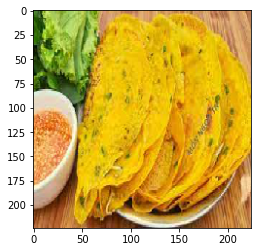

In [96]:
sample = load_img('/content/BANH XEO.jpg', target_size =(224,224))
plt.imshow(sample)
sample = img_to_array(sample)
sample = sample.reshape(1,224,224,3)
sample = sample.astype('float32')
sample = sample/255
result = np.argmax(model_CNN.predict(sample),axis= 1)
key = [k for k, v in validation_dataset.class_indices.items() if v == result]
print(key)